In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
df=pd.read_csv('train.csv')

<BarContainer object of 50 artists>

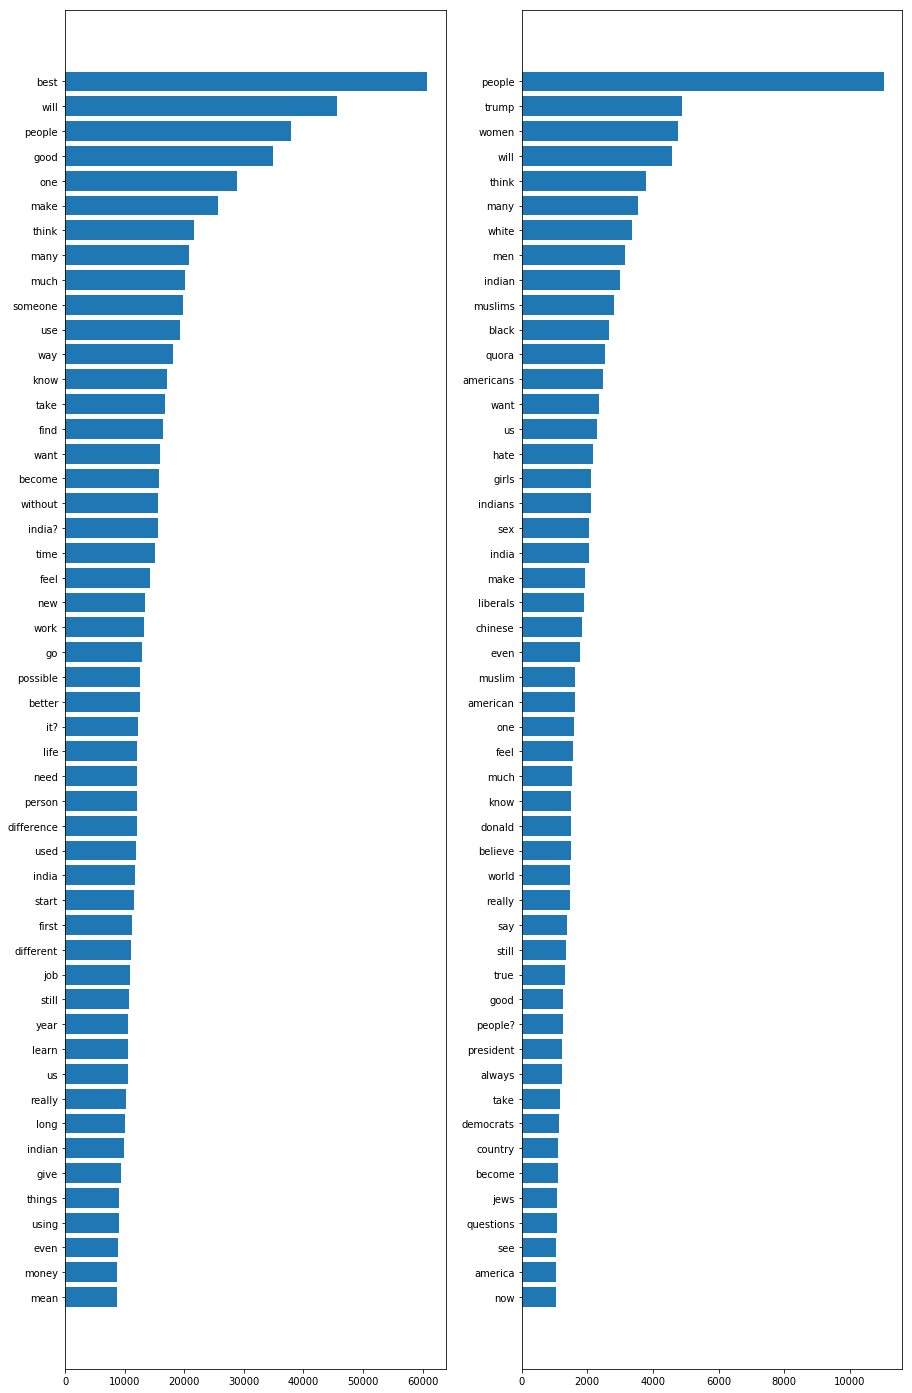

In [3]:
from wordcloud import WordCloud, STOPWORDS

from collections import defaultdict
df_1 = df[df["target"]==1]
df_0 = df[df["target"]==0]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]




freq_dict = defaultdict(int)
for sent in df_0["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted_0 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1],reverse=True))
fd_sorted_0.columns = ["word", "wordcount"]



freq_dict = defaultdict(int)
for sent in df_1["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted_1 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1],reverse=True))
fd_sorted_1.columns = ["word", "wordcount"]

fig,ax=plt.subplots(1,2)
fig.set_size_inches(15, 25)
ax[0].barh(width=fd_sorted_0.head(50)['wordcount'][::-1],y=fd_sorted_0.head(50)['word'][::-1])
ax[1].barh(width=fd_sorted_1.head(50)['wordcount'][::-1],y=fd_sorted_1.head(50)['word'][::-1])




These are the most popular words for sincere and insincere questions.

As expected for the insincere questions the most popular words refer to political figures , racial and ethnic communities.

<BarContainer object of 50 artists>

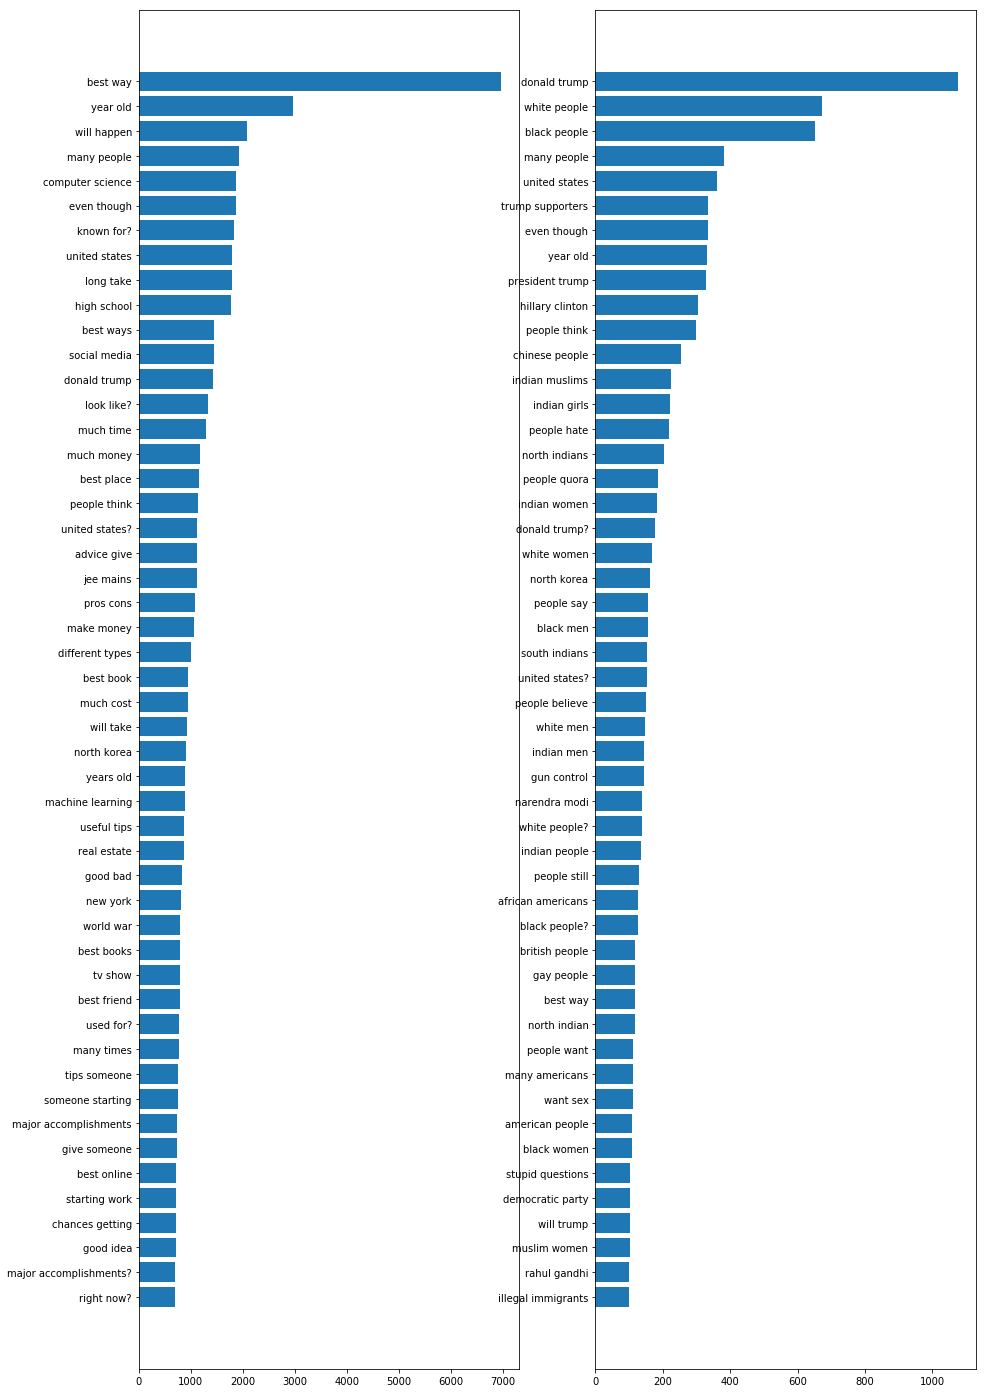

In [4]:
freq_dict = defaultdict(int)
for sent in df_0["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted_0 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1],reverse=True))
fd_sorted_0.columns = ["word", "wordcount"]



freq_dict = defaultdict(int)
for sent in df_1["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted_1 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1],reverse=True))
fd_sorted_1.columns = ["word", "wordcount"]

fig,ax=plt.subplots(1,2)
fig.set_size_inches(15, 25)
ax[0].barh(width=fd_sorted_0.head(50)['wordcount'][::-1],y=fd_sorted_0.head(50)['word'][::-1])
ax[1].barh(width=fd_sorted_1.head(50)['wordcount'][::-1],y=fd_sorted_1.head(50)['word'][::-1])

We get similar results for bigrams as well.

The insincere questions frequently mention Trump , white/black people or contain sexual content.

<BarContainer object of 50 artists>

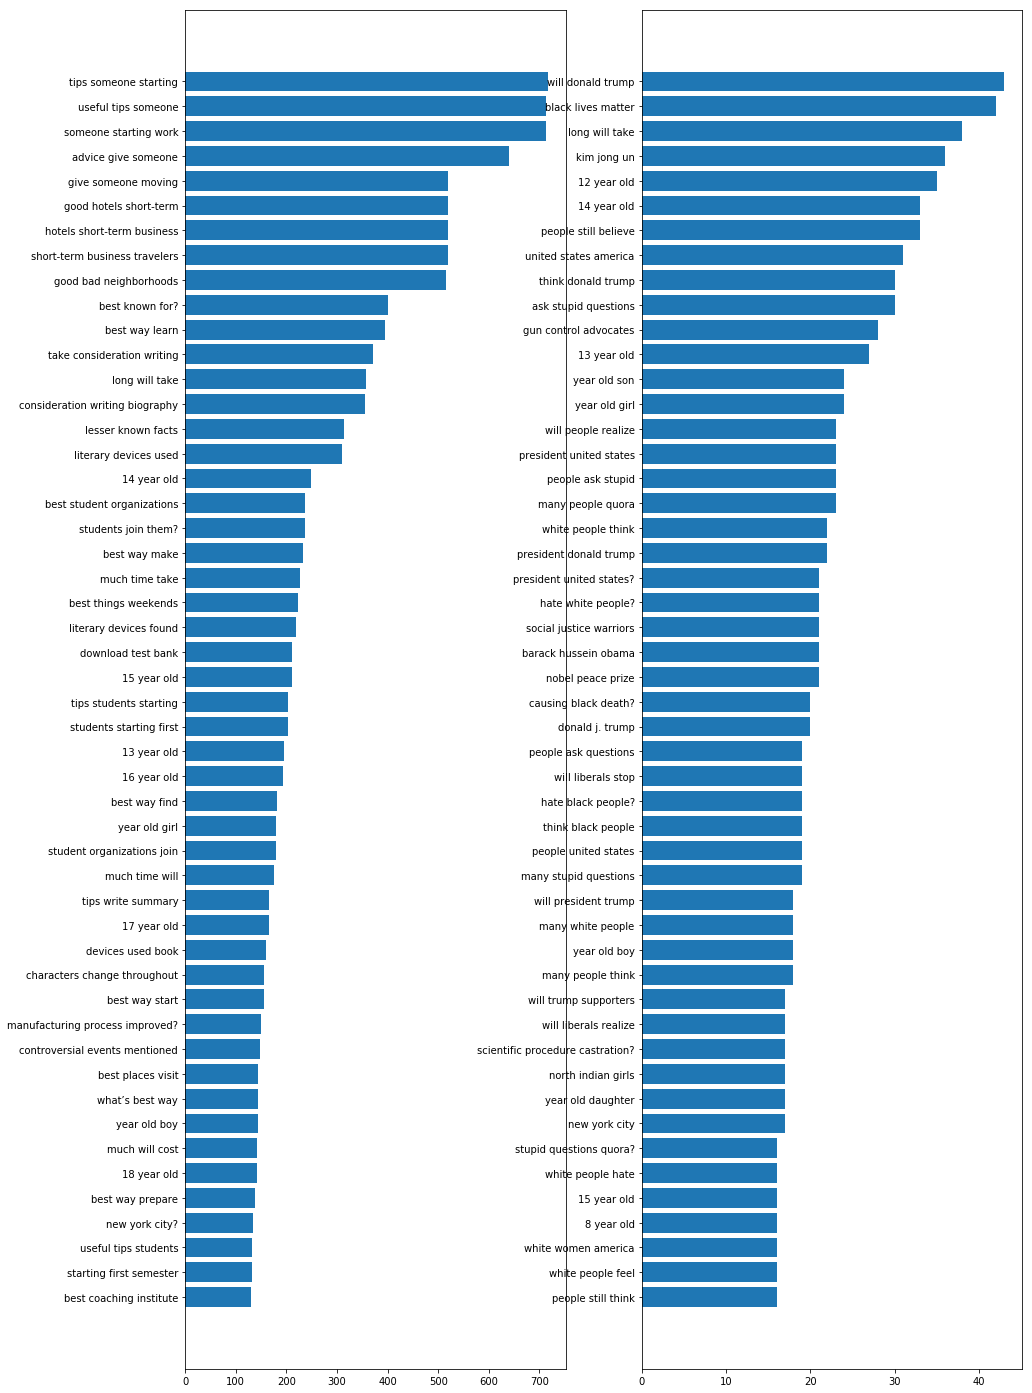

In [5]:
freq_dict = defaultdict(int)
for sent in df_0["question_text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted_0 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1],reverse=True))
fd_sorted_0.columns = ["word", "wordcount"]



freq_dict = defaultdict(int)
for sent in df_1["question_text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted_1 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1],reverse=True))
fd_sorted_1.columns = ["word", "wordcount"]

fig,ax=plt.subplots(1,2)
fig.set_size_inches(15, 25)
ax[0].barh(width=fd_sorted_0.head(50)['wordcount'][::-1],y=fd_sorted_0.head(50)['word'][::-1])
ax[1].barh(width=fd_sorted_1.head(50)['wordcount'][::-1],y=fd_sorted_1.head(50)['word'][::-1])

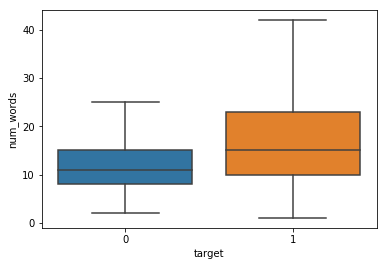

In [6]:
## Number of words in the text ##
df["num_words"] = df["question_text"].apply(lambda x: len(str(x).split()))

sns.boxplot(data=df,x='target',y="num_words",showfliers=False)

Insincere questions appear to have more words per question.

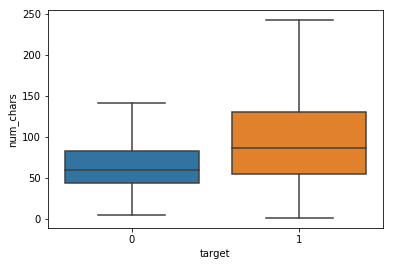

In [7]:
## Number of characters in the text ##
df["num_chars"] = df["question_text"].apply(lambda x: len(str(x)))


sns.boxplot(data=df,x='target',y="num_chars",showfliers=False)